### INSTRUCTIONS - Assignment 2

- Submit only the ipynb file with file format main_{UBID}.ipynb (e.g. main_50370999.ipynb), Submission other than this format will get zero.
- Don't submit the zip folder.
- We will run all the cells from start to finish, if we get any error or cell stuck for more than 20 sec. will get zero for that problem. So make sure ipynb file run from start to finish before submitting.

- Refrain from using Sklearn library unless explicitly mentioned.

- Don't import additional libraries in the file.


In [2]:
# imports
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data

In [3]:
# import os
# print(os.getcwd())

In [4]:
# loads csv file into pandas dataframe
df = pd.read_csv('IRIS_data.csv')
### Dropping sepal width as it is not able to show much variance across the three classes and the features will be independent.
df.drop(columns=['sepal_width'],inplace=True)
len(df)

150

#### STEP 2 - PreProcessing
Do Label Encoding: Convert string Label to integer

and Convert string column to float

( 5 Points)

In [5]:
# STEP 2
irisDict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['species'] = df['species'].map(irisDict)

In [6]:
df

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0
...,...,...,...,...
145,6.7,5.2,2.3,2
146,6.3,5.0,1.9,2
147,6.5,5.2,2.0,2
148,6.2,5.4,2.3,2


#### STEP 3 - 
Split the Data into different training subsets and testing split. Do training on different training sets and check their respective accuracy on Testset

( 50% Training - Subset1, 30% Training - Subset2 and 20% Testing) 

Hint: The train_test split with stratify function is already imported earlier in the notebook

( 5 Points)

In [87]:
#STEP 3
train,test = train_test_split(df,train_size=0.8,random_state=16,shuffle=True)
train1,train2 = train[:len(train)*5//8],train[len(train)*5//8:]
print(len(train1),len(train2),len(test),len(df))
df.describe()

75 45 30 150


,sepal_length,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.758667,1.198667,1.000000
std,0.828066,1.764420,0.763161,0.819232
min,4.300000,1.000000,0.100000,0.000000
25%,5.100000,1.600000,0.300000,0.000000
50%,5.800000,4.350000,1.300000,1.000000
75%,6.400000,5.100000,1.800000,2.000000
max,7.900000,6.900000,2.500000,2.000000


#### Steps 4 to 8 

Naive Bayes Implementation

(40 Points)

### Implement the Next Steps 
- Step 4: Separate By Class - we will first need to separate our training data by class.

- Step 5: Summarize Dataset - We need two statistics from a given set of data. The two statistics are the mean and the standard deviation.

- Step 6: Summarize Data By Class - Summarize (i.e. Mean and Standard deviation) of the dataset organized by separate classes.

In [88]:
# STEP 4-6
########## 4 ############
train1Class0,train1Class1,train1Class2 = train1[train1['species']==0],train1[train1['species']==1],train1[train1['species']==2]
train2Class0,train2Class1,train2Class2 = train2[train2['species']==0],train2[train2['species']==1],train2[train2['species']==2]
print(len(train1Class0),len(train1Class1),len(train1Class2),len(train2Class0),len(train2Class1),len(train2Class2))

28 26 21 12 12 21


In [89]:
####### Function for 5
def summarizzeDataset(dataframe):
    copy = dataframe.copy()
    copy.drop(columns=['species'],inplace=True)
    return copy.mean(), copy.std()

In [90]:
######### Summary of Entire Data
EntireDataSetMean,EntireDataSetStd = summarizzeDataset(df)
print('#### Entire Dataset Mean #####')
print(EntireDataSetMean)
print()
print('#### Entire Dataset Standard Deviation #####')
print(EntireDataSetStd) 

#### Entire Dataset Mean #####
sepal_length    5.843333
petal_length    3.758667
petal_width     1.198667
dtype: float64

#### Entire Dataset Standard Deviation #####
sepal_length    0.828066
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [91]:
################ Summary of train1 and train2 ##################

print('################train1 Summary#####################')
train1Mean,train1Std = summarizzeDataset(train1)
print('#### train1 Dataset Mean #####')
print(train1Mean)
print()
print('#### train1 Dataset Standard Deviation #####')
print(train1Std) 
print()
print()
print()
print('################train2 Summary#####################')
train2Mean,train2Std = summarizzeDataset(train2)
print('#### train2 Dataset Mean #####')
print(train2Mean)
print()
print('#### train1 Dataset Standard Deviation #####')
print(train2Std) 


################train1 Summary#####################
#### train1 Dataset Mean #####
sepal_length    5.770667
petal_length    3.589333
petal_width     1.114667
dtype: float64

#### train1 Dataset Standard Deviation #####
sepal_length    0.843380
petal_length    1.785873
petal_width     0.766475
dtype: float64



################train2 Summary#####################
#### train2 Dataset Mean #####
sepal_length    6.013333
petal_length    4.075556
petal_width     1.384444
dtype: float64

#### train1 Dataset Standard Deviation #####
sepal_length    0.789303
petal_length    1.767015
petal_width     0.759472
dtype: float64


In [92]:
########### Train 1 classes description ###################
print('################train1 Class0 Summary#####################')
train1Class0Mean,train1class0Std = summarizzeDataset(train1Class0)
print('#### train1 Class0 Dataset Mean #####')
print(train1Class0Mean)
print()
print('#### train1 Class0 Dataset Standard Deviation #####')
print(train1class0Std) 
print()
print()
print()
print('################train1 Class1 Summary#####################')
train1Class1Mean,train1class1Std = summarizzeDataset(train1Class1)
print('#### train1 Class1 Dataset Mean #####')
print(train1Class1Mean)
print()
print('#### train1 Class1 Dataset Standard Deviation #####')
print(train1class1Std) 
print()
print()
print()
print('################train1 Class2 Summary#####################')
train1Class2Mean,train1class2Std = summarizzeDataset(train1Class2)
print('#### train1 Class2 Dataset Mean #####')
print(train1Class2Mean)
print()
print('#### train1 Class2 Dataset Standard Deviation #####')
print(train1class2Std) 
print()
print()
print()

################train1 Class0 Summary#####################
#### train1 Class0 Dataset Mean #####
sepal_length    5.000000
petal_length    1.478571
petal_width     0.239286
dtype: float64

#### train1 Class0 Dataset Standard Deviation #####
sepal_length    0.346410
petal_length    0.195044
petal_width     0.113331
dtype: float64



################train1 Class1 Summary#####################
#### train1 Class1 Dataset Mean #####
sepal_length    5.800000
petal_length    4.211538
petal_width     1.300000
dtype: float64

#### train1 Class1 Dataset Standard Deviation #####
sepal_length    0.347563
petal_length    0.432043
petal_width     0.211660
dtype: float64



################train1 Class2 Summary#####################
#### train1 Class2 Dataset Mean #####
sepal_length    6.761905
petal_length    5.633333
petal_width     2.052381
dtype: float64

#### train1 Class2 Dataset Standard Deviation #####
sepal_length    0.674148
petal_length    0.623164
petal_width     0.244170
dtype: float64





In [93]:
########### Train 2 classes description ###################
print('################train2 Class0 Summary#####################')
train2Class0Mean,train2class0Std = summarizzeDataset(train2Class0)
print('#### train2 Class0 Dataset Mean #####')
print(train2Class0Mean)
print()
print('#### train2 Class0 Dataset Standard Deviation #####')
print(train2class0Std) 
print()
print()
print()
print('################train2 Class1 Summary#####################')
train2Class1Mean,train2class1Std = summarizzeDataset(train2Class1)
print('#### train2 Class1 Dataset Mean #####')
print(train2Class1Mean)
print()
print('#### train2 Class1 Dataset Standard Deviation #####')
print(train2class1Std) 
print()
print()
print()
print('################train2 Class2 Summary#####################')
train2Class2Mean,train2class2Std = summarizzeDataset(train2Class2)
print('#### train2 Class2 Dataset Mean #####')
print(train2Class2Mean)
print()
print('#### train2 Class2 Dataset Standard Deviation #####')
print(train2class2Std) 
print()
print()
print()

################train2 Class0 Summary#####################
#### train2 Class0 Dataset Mean #####
sepal_length    5.125000
petal_length    1.425000
petal_width     0.283333
dtype: float64

#### train2 Class0 Dataset Standard Deviation #####
sepal_length    0.420227
petal_length    0.176455
petal_width     0.102986
dtype: float64



################train2 Class1 Summary#####################
#### train2 Class1 Dataset Mean #####
sepal_length    6.000000
petal_length    4.208333
petal_width     1.325000
dtype: float64

#### train2 Class1 Dataset Standard Deviation #####
sepal_length    0.664694
petal_length    0.593079
petal_width     0.191288
dtype: float64



################train2 Class2 Summary#####################
#### train2 Class2 Dataset Mean #####
sepal_length    6.528571
petal_length    5.514286
petal_width     2.047619
dtype: float64

#### train2 Class2 Dataset Standard Deviation #####
sepal_length    0.527393
petal_length    0.509201
petal_width     0.227198
dtype: float64





- Step 7: Gaussian Probability Density Function - Calculating the probability or likelihood of observing a given real-value like X1 is difficult. So We Assume that X1 values are drawn from a distribution, such as Gaussian distribution.


<div>
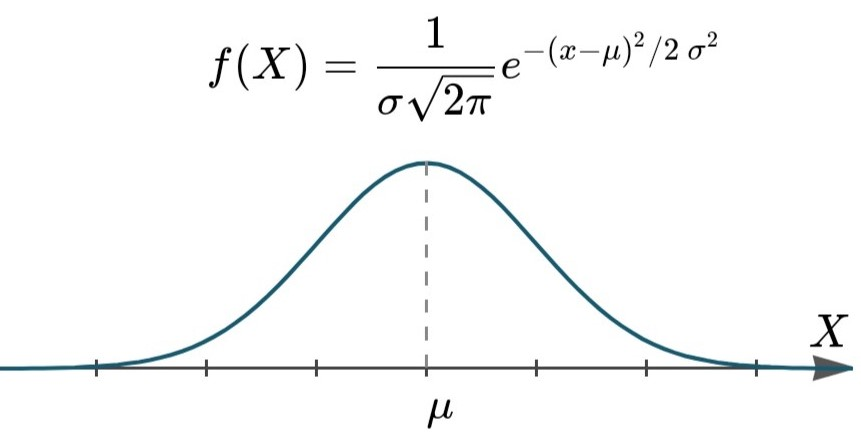
</div>

In [94]:
# STEP 7
########### Code refferred from mulivar_gauss.ipynb files from supporting materials
def multivariate_normal(x, d, mean, covariance):
    """probability distribution of the multivariate normal distribution.
       x -> input
       d -> dimension
       mean -> mean vector
       covariance -> covariance matrix
    """
    x_m = x - mean
    # print('x',x)
    # print('covariance',covariance)
    # print('x_m',x_m)
    # print('mean',mean)
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def multivariate_dataset(trainFunc, d, mean, variance):
    # train_copy.drop(columns=['species'])
    pdf_train = []
    for index,row in trainFunc.iterrows():
        pdf_train.append(multivariate_normal(row,d,mean,variance))

    return np.array(pdf_train)

- Step 8: Calculate Class Probabilities - Use the statistics from our training data to calculate probabilities for new data. Probabilities are calculated separately for each class. This means that we first calculate the probability that a new piece of data belongs to the first class, then calculate probabilities that it belongs to the second class, and so on for all the classes.


<div>
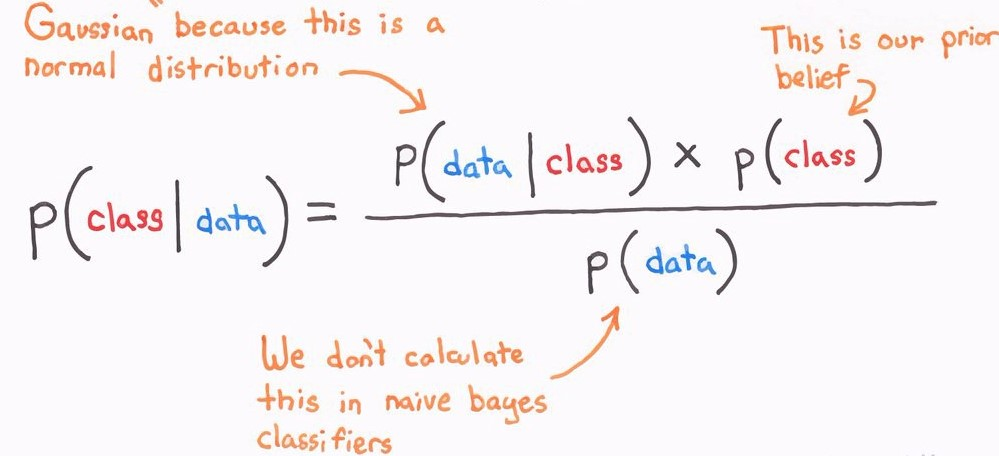
</div>

In [95]:
### Prior probabilities of train1
priorTrain1Class0 = len(train1[train1['species']==0])/len(train1)
priorTrain1Class1 = len(train1[train1['species']==1])/len(train1)
priorTrain1Class2 = len(train1[train1['species']==2])/len(train1)


### Prior probabilities of train2
priorTrain2Class0 = len(train2[train2['species']==0])/len(train2)
priorTrain2Class1 = len(train2[train2['species']==1])/len(train2)
priorTrain2Class2 = len(train2[train2['species']==2])/len(train2)



In [96]:
# STEP 8
#### The mean and variance will change according to the mean and variances calculated for each class calculated in the train1 and train2. Do it for all the trains generarated
##### The features of the dataset are independent and uncorrelated. Thus, the covariance matrix will be a diagonal matrix of variances which is square of standard deviation 

#### For the entire train1 on class 0,1 and 2 with respect to classes 
train1Copy = train1.copy()
train1Copy.drop(columns=['species'],inplace=True)
#### train1 data against classes of train1
train1Class0Prob = multivariate_dataset(train1Copy,3,train1Class0Mean,np.diag(train1class0Std**2))
train1Class0Prob = train1Class0Prob*priorTrain1Class0

train1Class1Prob = multivariate_dataset(train1Copy,3,train1Class1Mean,np.diag(train1class1Std**2))
train1Class1Prob = train1Class1Prob*priorTrain1Class1

train1Class2Prob = multivariate_dataset(train1Copy,3,train1Class2Mean,np.diag(train1class2Std**2))
train1Class2Prob = train1Class2Prob*priorTrain1Class2


train1Ontrain1 = []
for i in range(len(train1Class1Prob)):
    train1Ontrain1.append([train1Class0Prob[i],train1Class1Prob[i],train1Class2Prob[i]])
# train1Ontrain1

In [97]:
#### For the entire train1 on class 0,1 and 2 with respect to classes 
train1Copy = train1.copy()
train1Copy.drop(columns=['species'],inplace=True)
#### train1 data against classes of train2

train1Class0Prob2 = multivariate_dataset(train1Copy,3,train2Class0Mean,np.diag(train2class0Std**2))
train1Class0Prob2 = train1Class0Prob2*priorTrain2Class0

train1Class1Prob2 = multivariate_dataset(train1Copy,3,train2Class1Mean,np.diag(train2class1Std**2))
train1Class1Prob2 = train1Class1Prob2*priorTrain2Class1

train1Class2Prob2 = multivariate_dataset(train1Copy,3,train2Class2Mean,np.diag(train2class2Std**2))
train1Class2Prob2 = train1Class2Prob2*priorTrain2Class2

train1Ontrain2 = []
for i in range(len(train1Class0Prob2)):
    train1Ontrain2.append([train1Class0Prob2[i],train1Class1Prob2[i],train1Class2Prob2[i]])



In [98]:
#### For the entire train2 on class 0,1 and 2 with respect to classes 
train2Copy = train2.copy()
### Since the features are independent and uncorrelated, we can form the covariance matrix as the diagonal matrix
train2Copy.drop(columns=['species'],inplace=True)
#### train2 data against classes of train1

train2Class0Prob = multivariate_dataset(train2Copy,3,train1Class0Mean,np.diag(train1class0Std**2))
train2Class0Prob = train2Class0Prob*priorTrain1Class0

train2Class1Prob = multivariate_dataset(train2Copy,3,train1Class1Mean,np.diag(train1class1Std**2))
train2Class1Prob = train2Class1Prob*priorTrain1Class1

train2Class2Prob = multivariate_dataset(train2Copy,3,train1Class2Mean,np.diag(train1class2Std**2))
train2Class2Prob = train2Class2Prob*priorTrain1Class2

train2Ontrain1 = []
for i in range(len(train2Class0Prob)):
    train1Ontrain2.append([train2Class0Prob[i],train2Class1Prob[i],train2Class2Prob[i]])


In [99]:
#### For the entire train2 on class 0,1 and 2 with respect to classes 
train2Copy = train2.copy()
### Since the features are independent and uncorrelated, we can form the covariance matrix as the diagonal matrix
train2Copy.drop(columns=['species'],inplace=True)
#### train2 data against classes of train2
train2Class0Prob2 = multivariate_dataset(train2Copy,3,train2Class0Mean,np.diag(train2class0Std**2))
train2Class0Prob2 = train2Class0Prob2*priorTrain2Class0

train2Class1Prob2 = multivariate_dataset(train2Copy,3,train2Class1Mean,np.diag(train2class1Std**2))
train2Class1Prob2 = train2Class1Prob2*priorTrain2Class1

train2Class2Prob2 = multivariate_dataset(train2Copy,3,train2Class2Mean,np.diag(train2class2Std**2))
train2Class2Prob2 = train2Class2Prob2*priorTrain2Class2

train2Ontrain2 = []
for i in range(len(train2Class0Prob2)):
    train1Ontrain2.append([train2Class0Prob2[i],train2Class1Prob2[i],train2Class2Prob2[i]])

In [100]:
# USE Above methods to do prediction
#### Dor the test dataset on train1
testCopy = test.copy()
testCopy.drop(columns=['species'],inplace=True)
#### test data against classes of train1
testClass0Prob =  multivariate_dataset(testCopy,3,train1Class0Mean,np.diag(train1class0Std**2))
testClass0Prob = testClass0Prob*priorTrain1Class0

testClass1Prob =  multivariate_dataset(testCopy,3,train1Class1Mean,np.diag(train1class1Std**2))
testClass1Prob = testClass1Prob*priorTrain1Class1

testClass2Prob =  multivariate_dataset(testCopy,3,train1Class2Mean,np.diag(train1class2Std**2))
testClass2Prob = testClass2Prob*priorTrain1Class2

testOntrain1 = []
for i in range(len(testClass0Prob)):
    testOntrain1.append([testClass0Prob[i],testClass1Prob[i],testClass2Prob[i]])

testClass0Prob2 =  multivariate_dataset(testCopy,3,train2Class0Mean,np.diag(train2class0Std**2))
testClass0Prob2 = testClass0Prob2*priorTrain2Class0

testClass1Prob2 =  multivariate_dataset(testCopy,3,train2Class1Mean,np.diag(train2class1Std**2))
testClass1Prob2 = testClass1Prob2*priorTrain2Class1

testClass2Prob2 =  multivariate_dataset(testCopy,3,train2Class2Mean,np.diag(train2class2Std**2))
testClass2Prob2 = testClass2Prob2*priorTrain2Class2

testOntrain2 = []
for i in range(len(testClass0Prob2)):
    testOntrain2.append([testClass0Prob2[i],testClass1Prob2[i],testClass2Prob2[i]])

#### Steps 9 to 12 

Define the classifier 
(40 Points)


- Step 9: Define the Objective function

Here, our **objective function** is to maximize the discriminant function $g_i(\pmb x)$, which we define as the posterior probability to perform a **minimum-error classification** (Bayes classifier). 

$ g_1(\pmb x) = P(\omega_1 | \; \pmb{x}), \quad  g_2(\pmb{x}) = P(\omega_2 | \; \pmb{x}), \quad  g_3(\pmb{x}) = P(\omega_2 | \; \pmb{x})$


In [101]:
# STEP 9
### Code referred from maximum_likelihood_estimate given in supporting materials###
def discriminant_function(x_vec, cov_mat, mu_vec):
    """
    Calculates the value of the discriminant function for a dx1 dimensional
    sample given the covariance matrix and mean vector.
    
    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        cov_mat: numpy array of the covariance matrix.
        mu_vec: dx1 dimensional numpy array of the sample mean.
    
    Returns a float value as result of the discriminant function.
    
    """
    W_i = (-1/2) * np.linalg.inv(cov_mat)
    assert(W_i.shape[0] > 1 and W_i.shape[1] > 1), 'W_i must be a matrix'
    
    w_i_dummy = np.linalg.inv(cov_mat).dot(mu_vec)
    w_i = w_i_dummy[:,np.newaxis]
    # print(w_i)
    assert(w_i.shape[0] > 1 and w_i.shape[1] == 1), 'w_i must be a column vector'
    
    omega_i_p1 = (((-1/2) * (mu_vec).T).dot(np.linalg.inv(cov_mat))).dot(mu_vec)
    omega_i_p2 = (-1/2) * np.log(np.linalg.det(cov_mat))
    omega_i_dummy = omega_i_p1 - omega_i_p2
    omega_i = np.reshape(omega_i_dummy,(1,1))
    # print(omega_i.shape)
    assert(omega_i.shape == (1, 1)), 'omega_i must be a scalar'
    
    g = ((x_vec.T).dot(W_i)).dot(x_vec) + (w_i.T).dot(x_vec) + omega_i
    return float(g)

- Step 10: Define the decision rule
So that our decision rule is to choose the class $\omega_i$ for which $g_i(\pmb x)$ is max., where  
 $ \quad g_i(\pmb{x}) = \pmb{x}^{\,t} \bigg( - \frac{1}{2} \Sigma_i^{-1} \bigg) \pmb{x} + \bigg( \Sigma_i^{-1} \pmb{\mu}_{\,i}\bigg)^t \pmb x + \bigg( -\frac{1}{2} \pmb{\mu}_{\,i}^{\,t}  \Sigma_{i}^{-1} \pmb{\mu}_{\,i} -\frac{1}{2} ln(|\Sigma_i|)\bigg) $
 
It will returns the max. $g_i(\pmb x)$ with the corresponding class label:

In [102]:
# STEP 10
import operator

def classify_data(x_vec, g, mu_vecs, cov_mats):
    """
    Classifies an input sample into 1 out of 3 classes determined by
    maximizing the discriminant function g_i().
    
    Keyword arguments:
        x_vec: A dx1 dimensional numpy array representing the sample.
        g: The discriminant function.
        mu_vecs: A list of mean vectors as input for g.
        cov_mats: A list of covariance matrices as input for g.
    
    Returns a tuple (g_i()_value, class label).
    
    """
    assert(len(mu_vecs) == len(cov_mats)), 'Number of mu_vecs and cov_mats must be equal.'
    
    g_vals = []
    for m,c in zip(mu_vecs, cov_mats): 
        g_vals.append(g(x_vec, mu_vec=m, cov_mat=c))
    
    max_index, max_value = max(enumerate(g_vals), key=operator.itemgetter(1))
    return (max_value, max_index)

- Step 11

Using the discriminant function and classifier that we just implemented above,Use that to classify data.

In [114]:
# STEP 11
covMattrain1Class0,covMattrain1Class1,covMattrain1Class2 = np.diag(train1class0Std**2),np.diag(train1class1Std**2),np.diag(train1class2Std**2)
covMattrain2Class0,covMattrain2Class1,covMattrain2Class2 = np.diag(train2class0Std**2),np.diag(train2class1Std**2),np.diag(train2class2Std**2)


# predictionAsClass0inTrain1Class0,predictionAsClass0inTrain1Class1,predictionAsClass0inTrain1Class2 = 0,0,0
test0Ontrain1Class0,test0Ontrain1Class1,test0Ontrain1Class2 = 0,0,0
test1Ontrain1Class0,test1Ontrain1Class1,test1Ontrain1Class2 = 0,0,0
test2Ontrain1Class0,test2Ontrain1Class1,test2Ontrain1Class2 = 0,0,0


testClass0, testClass1, testClass2 = test[test['species']==0],test[test['species']==1],test[test['species']==2]
testClass0.drop(columns=['species'],inplace=True)
testClass1.drop(columns=['species'],inplace=True)
testClass2.drop(columns=['species'],inplace=True)

for index, row in testClass0.iterrows():
    prob = classify_data(row,discriminant_function,[train1Class0Mean,train1Class1Mean,train1Class2Mean],[covMattrain1Class0,covMattrain1Class1,covMattrain1Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test0Ontrain1Class0 = test0Ontrain1Class0+1
    elif(prob[1]==1):
        test0Ontrain1Class1 = test0Ontrain1Class1+1
    else:
        test0Ontrain1Class2 = test0Ontrain1Class2+1
    
for index, row in testClass1.iterrows():
    prob = classify_data(row,discriminant_function,[train1Class0Mean,train1Class1Mean,train1Class2Mean],[covMattrain1Class0,covMattrain1Class1,covMattrain1Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test1Ontrain1Class0 = test1Ontrain1Class0+1
    elif(prob[1]==1):
        test1Ontrain1Class1 = test1Ontrain1Class1+1
    else:
        test1Ontrain1Class2 = test1Ontrain1Class2+1

for index, row in testClass2.iterrows():
    prob = classify_data(row,discriminant_function,[train1Class0Mean,train1Class1Mean,train1Class2Mean],[covMattrain1Class0,covMattrain1Class1,covMattrain1Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test2Ontrain1Class0 = test2Ontrain1Class0+1
    elif(prob[1]==1):
        test2Ontrain1Class1 = test2Ontrain1Class1+1
    else:
        test2Ontrain1Class2 = test2Ontrain1Class2+1

print(test0Ontrain1Class0,test0Ontrain1Class1,test0Ontrain1Class2)
print(test1Ontrain1Class0,test1Ontrain1Class1,test1Ontrain1Class2)
print(test2Ontrain1Class0,test2Ontrain1Class1,test2Ontrain1Class2)


10 0 0
0 8 4
0 1 7


C:\Users\17164\AppData\Local\Temp\ipykernel_18092\4098258070.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testClass0.drop(columns=['species'],inplace=True)
C:\Users\17164\AppData\Local\Temp\ipykernel_18092\4098258070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testClass1.drop(columns=['species'],inplace=True)
C:\Users\17164\AppData\Local\Temp\ipykernel_18092\4098258070.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [113]:
test0Ontrain2Class0,test0Ontrain2Class1,test0Ontrain2Class2 = 0,0,0
test1Ontrain2Class0,test1Ontrain2Class1,test1Ontrain2Class2 = 0,0,0
test2Ontrain2Class0,test2Ontrain2Class1,test2Ontrain2Class2 = 0,0,0


for index, row in testClass0.iterrows():
    prob = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test0Ontrain2Class0 = test0Ontrain2Class0+1
    elif(prob[1]==1):
        test0Ontrain2Class1 = test0Ontrain2Class1+1
    else:
        test0Ontrain2Class2 = test0Ontrain2Class2+1
    
for index, row in testClass1.iterrows():
    prob = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test1Ontrain2Class0 = test1Ontrain2Class0+1
    elif(prob[1]==1):
        test1Ontrain2Class1 = test1Ontrain2Class1+1
    else:
        test1Ontrain2Class2 = test1Ontrain2Class2+1

for index, row in testClass2.iterrows():
    prob = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    # prob2 = classify_data(row,discriminant_function,[train2Class0Mean,train2Class1Mean,train2Class2Mean],[covMattrain2Class0,covMattrain2Class1,covMattrain2Class2])
    if(prob[1]==0):
        test2Ontrain2Class0 = test2Ontrain2Class0+1
    elif(prob[1]==1):
        test2Ontrain2Class1 = test2Ontrain2Class1+1
    else:
        test2Ontrain2Class2 = test2Ontrain2Class2+1

print(test0Ontrain2Class0,test0Ontrain2Class1,test0Ontrain2Class2)
print(test1Ontrain2Class0,test1Ontrain2Class1,test1Ontrain2Class2)
print(test2Ontrain2Class0,test2Ontrain2Class1,test2Ontrain2Class2)

10 0 0
0 11 1
0 3 5


#### STEP 12 - Evaluate the Trained Model of different Subsets (Subset1-50%, Subset2-30%) on Test Set. ( 10 Points) 
12.1 Evaluate the False Positive, False Negative, True Positive, True Negative (5 Points)

12.2 Evaluate the Precision, Recall, F1-Score. (5 Points)


In [112]:
# STEP 12
Fptrain1, Fntrain1, Tptrain1, Tntrain1 = 0,0,0,0
### Let class 0 be positive class. Then class 1 and 2 will be negative classes
Tptrain1 = test0Ontrain1Class0
Tntrain1 = test1Ontrain1Class1+test1Ontrain1Class2+test2Ontrain1Class1+test2Ontrain1Class2
Fptrain1 = test0Ontrain1Class1+test0Ontrain1Class2
Fntrain1 = test1Ontrain1Class0+test2Ontrain1Class0

precisiontrain1 =  Tptrain1/(Tptrain1+Fptrain1)
recalltrain1 = Tptrain1/(Tptrain1+Fntrain1)
f1scoretrain1 = (2*precisiontrain1*recalltrain1)/(precisiontrain1+recalltrain1)

print(precisiontrain1,recalltrain1,f1scoretrain1)


1.0 1.0 1.0


In [115]:
Fptrain2, Fntrain2, Tptrain2, Tntrain2 = 0,0,0,0
Tptrain2 = test0Ontrain2Class0
Tntrain2 = test1Ontrain2Class1+test1Ontrain2Class2+test2Ontrain2Class1+test2Ontrain2Class2
Fptrain2 = test0Ontrain2Class1+test0Ontrain2Class2
Fntrain2 = test1Ontrain2Class0+test2Ontrain2Class0

precisiontrain2 =  Tptrain2/(Tptrain2+Fptrain2)
recalltrain2 = Tptrain2/(Tptrain2+Fntrain2)
f1scoretrain2 = (2*precisiontrain2*recalltrain2)/(precisiontrain2+recalltrain2)

print(precisiontrain2,recalltrain2,f1scoretrain2)


1.0 1.0 1.0


## Useful Library references

  [test_train_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


[Matplotlib Documentation](https://matplotlib.org/)

## Other Reference 

  [Bayes Decision Theory](https://ublearns.buffalo.edu/ultra/courses/_192160_1/cl/outline)
  
  [MLBayesParameterEstimation](https://ublearns.buffalo.edu/ultra/courses/_192160_1/cl/outline)
